# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [2]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations in the dataset

#### Question 2. Create a summary table.

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE has a larger STD because GRE has a much wider score range (hundreds of points) as compared to GPA (4 points).

#### Question 4. Drop data points with missing data.


In [5]:
df_new = df_raw.dropna(axis=0)
df_new.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: New dataframe (df_new) doesn't have any missing values as shown below. 

In [6]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [7]:
df_new.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA.

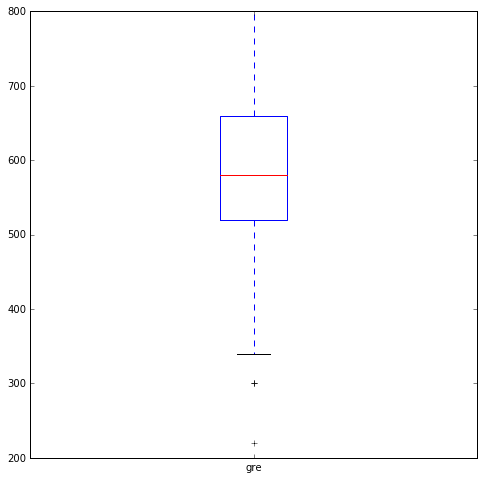

In [8]:
df_new.gre.plot(kind = 'box', figsize = (8, 8))

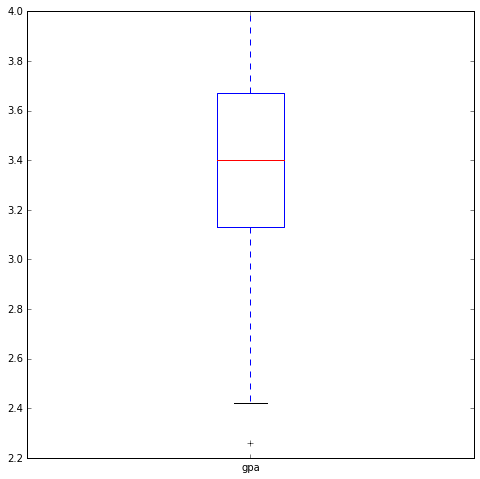

In [9]:
df_new.gpa.plot(kind = 'box', figsize = (8, 8))

#### Question 7. What do this plots show?

Answer: These plots show the median (red line), interquantile range (the box length) and the range of data. 

#### Question 8. Describe each distribution.

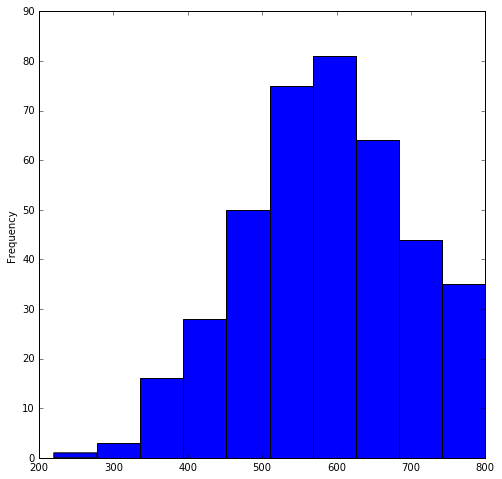

In [10]:
df_new.gre.plot(kind = 'hist', figsize = (8, 8))


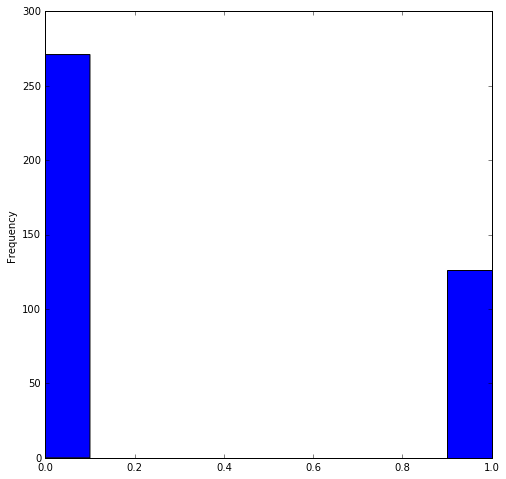

In [11]:
df_new.admit.plot(kind = 'hist', figsize = (8, 8))

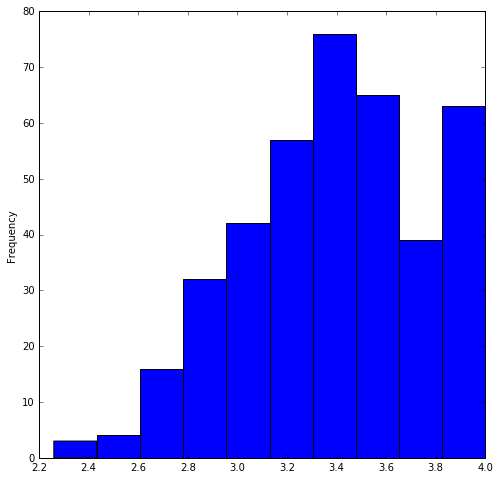

In [12]:
df_new.gpa.plot(kind = 'hist', figsize = (8, 8))

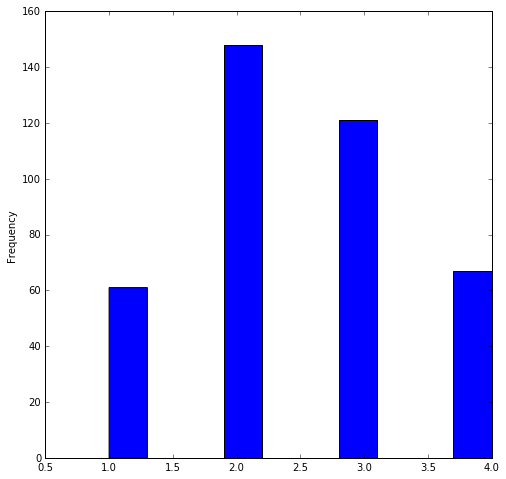

In [13]:
df_new.prestige.plot(kind = 'hist', figsize = (8, 8))

#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: The GPA and GRE variables seem to have left skew.

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: The distribution may need correstion due to minor left skew in GRE and GPA. It can be corrected if we transform the variables by taking log of the GRE and GPA variables.

#### Question 11. Which of our variables are potentially colinear?

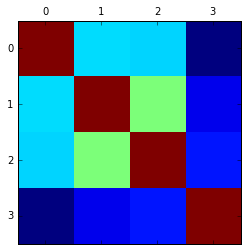

In [14]:
plt.matshow(df_new.corr())


In [15]:
corr = df_new.corr()
corr

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: Correlation matrix is one way to check for multicollinearity. In our dataset the highest correlation value is .38 (gre and gpa), which is not too high. Therefore multicollinearity should not be a problem.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: Scatterplot (for admit and prestige variables) can be used to explore the association between grad school admissions and prestige of undergraduate schools. Also, multiple regression analysis can be used with admission status as dependent variable and GRE, GPA and prestige as independent variable. The resulting coefficient for the prestige variable will show the effect of undergraduate schools prestige on grad school admission.

#### Question 14. What is your hypothesis?

Answer: The hypothesis: grad school admission depends on one or more of the following: gre, gpa, prestige.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

In [16]:
df_2 = df_raw.fillna(df_raw.median())

In [17]:
df_2.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [18]:
df_2.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64

#### 2. Bonus: Log transform the skewed data.

In [19]:
## replaced missing values with median value for each variable
df_new3 = df_new[[1]].apply(np.log)

In [20]:
df_new3.columns.values[0]='gre_log'

In [21]:
df_new3.head()

,gre_log
0,5.940171
1,6.492240
2,6.684612
3,6.461468
4,6.253829


In [22]:
df_new4 = df_new[[2]].apply(np.log)

In [23]:
df_new4.columns.values[0]='gpa_log'

In [24]:
df_new4.head()

,gpa_log
0,1.283708
1,1.300192
2,1.386294
3,1.160021
4,1.075002


In [25]:
df_new5 = pd.concat([df_new, df_new3, df_new4], axis=1)

In [26]:
df_new5.head()

,admit,gre,gpa,prestige,gre_log,gpa_log
0,0,380,3.61,3,5.940171,1.283708
1,1,660,3.67,3,6.492240,1.300192
2,1,800,4.00,1,6.684612,1.386294
3,1,640,3.19,4,6.461468,1.160021
4,0,520,2.93,4,6.253829,1.075002


#### 3. Advanced: Impute missing data.

In [27]:
## replaced missing values with preceding values
df_new6 = df_raw.fillna(method='pad')

In [28]:
df_new6.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [159]:
df_new6.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64